In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
pd.set_option("display.max.columns", None)

In [ ]:
pd.set_option("display.precision", 4)

In [ ]:
from google.colab import userdata
path = userdata.get('path_e_comm')

### Data overview

In [ ]:
df = pd.read_csv(path + 'modified_full_dataset.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("Data Types:")
print(df.dtypes)
print("Missing Values:")
print(df.isnull().sum())
print("Basic Statistics:")
print(df.describe())

Dataset Shape: (6999989, 23)
Data Types:
device_type               object
event_id                  object
user_id                    int64
user_is_authorized         int64
location_id                int64
create_timestamp          object
product_id                 int64
product_is_pick_up       float64
product_is_pick_point    float64
product_is_delivery      float64
product_is_now           float64
product_price            float64
ret_discount             float64
product_category          object
product_gender            object
product_age               object
brand_lvl                  int64
add_to_cart_flag           int64
create_order_flag          int64
timestamp                 object
hour                       int64
day_of_week                int64
date                      object
dtype: object
Missing Values:
device_type              0
event_id                 0
user_id                  0
user_is_authorized       0
location_id              0
create_timestamp         0
product_

In [ ]:
print("Conversion Rates")
print(f"Add to Cart Rate: {df['add_to_cart_flag'].mean():.2%}")
print(f"Order Creation Rate (from cart): {df[df['add_to_cart_flag']==1]['create_order_flag'].mean():.2%}")
print(f"Overall Conversion Rate: {(df['add_to_cart_flag'] * df['create_order_flag']).mean():.2%}")

Conversion Rates
Add to Cart Rate: 18.79%
Order Creation Rate (from cart): 26.63%
Overall Conversion Rate: 5.00%


In [ ]:
print("Device Type Distribution:")
print(df['device_type'].value_counts(normalize=True))

Device Type Distribution:
device_type
mobileapp_android    0.5730
mobileapp_ios        0.3109
desktop              0.1162
Name: proportion, dtype: float64


In [ ]:
print("Authorized vs Non-Authorized Users:")
print(df['user_is_authorized'].value_counts(normalize=True))

Authorized vs Non-Authorized Users:
user_is_authorized
1    0.8692
0    0.1308
Name: proportion, dtype: float64


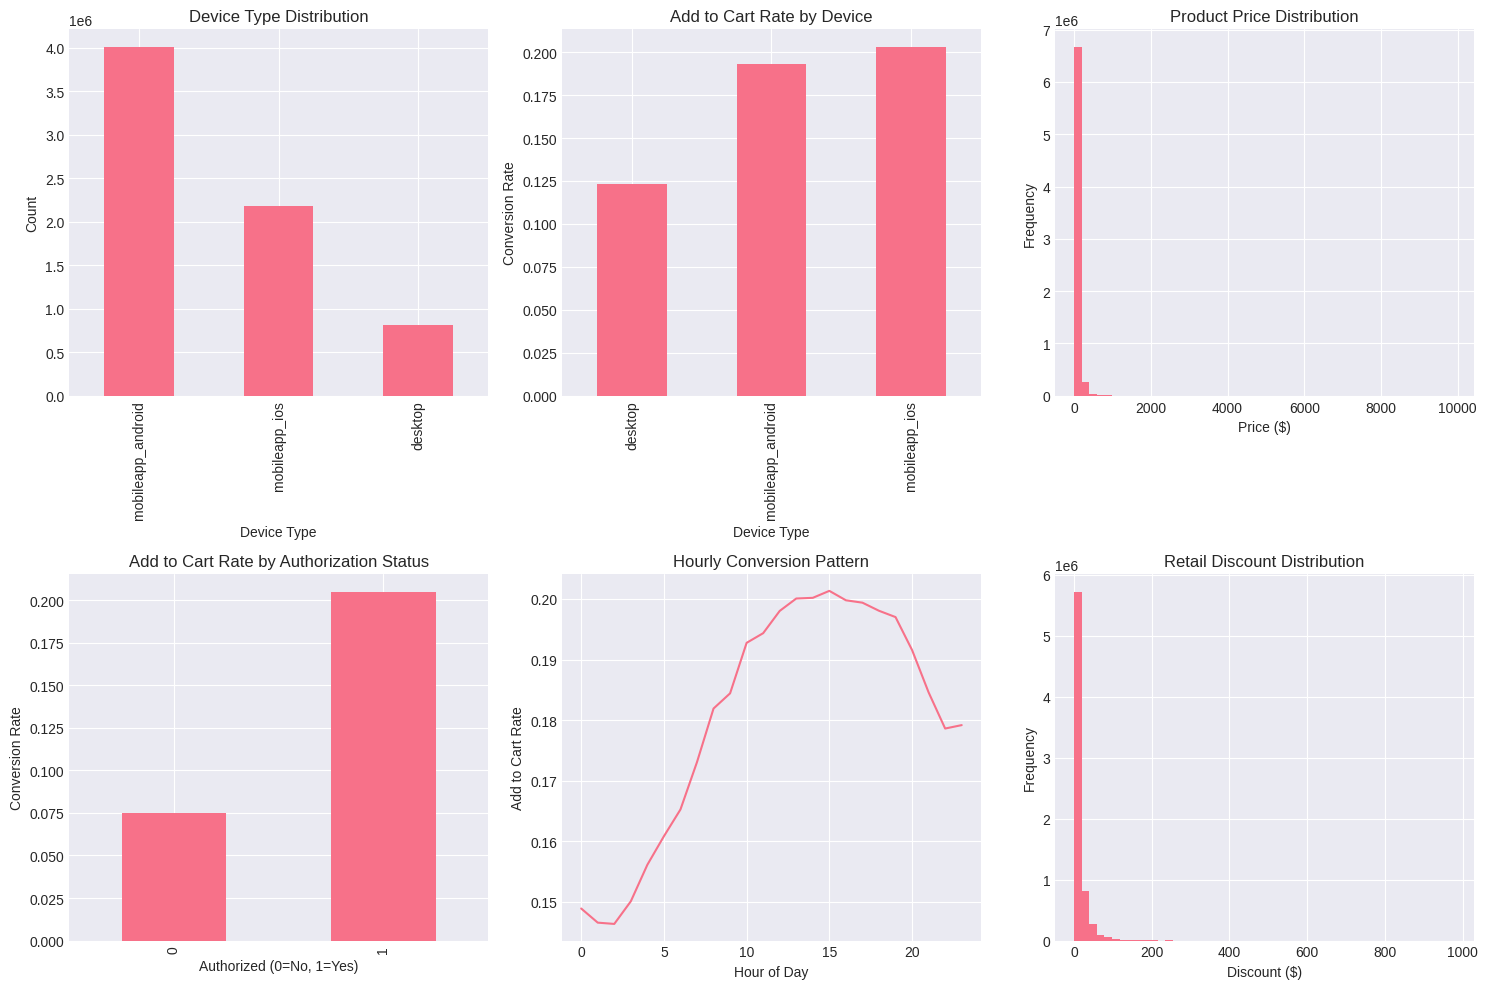

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df['device_type'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Device Type Distribution')
axes[0,0].set_xlabel('Device Type')
axes[0,0].set_ylabel('Count')

conversion_by_device = df.groupby('device_type')['add_to_cart_flag'].mean()
conversion_by_device.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Add to Cart Rate by Device')
axes[0,1].set_xlabel('Device Type')
axes[0,1].set_ylabel('Conversion Rate')

df['product_price'].hist(bins=50, ax=axes[0,2])
axes[0,2].set_title('Product Price Distribution')
axes[0,2].set_xlabel('Price ($)')
axes[0,2].set_ylabel('Frequency')

conversion_by_auth = df.groupby('user_is_authorized')['add_to_cart_flag'].mean()
conversion_by_auth.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Add to Cart Rate by Authorization Status')
axes[1,0].set_xlabel('Authorized (0=No, 1=Yes)')
axes[1,0].set_ylabel('Conversion Rate')

hourly_pattern = df.groupby('hour')['add_to_cart_flag'].agg(['mean', 'count'])
hourly_pattern['mean'].plot(ax=axes[1,1])
axes[1,1].set_title('Hourly Conversion Pattern')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Add to Cart Rate')

df['ret_discount'].hist(bins=50, ax=axes[1,2])
axes[1,2].set_title('Retail Discount Distribution')
axes[1,2].set_xlabel('Discount ($)')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print("Product Category Analysis:")
category_stats = df.groupby('product_category').agg({
    'event_id': 'count',
    'add_to_cart_flag': 'mean',
    'product_price': 'mean'
}).round(2)
category_stats.columns = ['views', 'add_to_cart_rate', 'avg_price']
print(category_stats.sort_values('views', ascending=False).head(10))

print("Brand Level Analysis:")
brand_stats = df.groupby('brand_lvl').agg({
    'event_id': 'count',
    'add_to_cart_flag': 'mean',
    'product_price': 'mean'
}).round(2)
brand_stats.columns = ['views', 'add_to_cart_rate', 'avg_price']
print(brand_stats)

Product Category Analysis:
                    views  add_to_cart_rate  avg_price
product_category                                      
clothing          3353274              0.20      35.90
shoes             2705633              0.17      70.48
inventory          941082              0.19     121.82
Brand Level Analysis:
             views  add_to_cart_rate  avg_price
brand_lvl                                      
0          1802151              0.15      93.45
1          2233791              0.19      53.05
2          2964047              0.21      46.82


In [ ]:
print("Delivery Options Impact:")
delivery_cols = ['product_is_pick_up', 'product_is_pick_point', 'product_is_delivery', 'product_is_now']
for col in delivery_cols:
    conv_rate = df.groupby(col)['add_to_cart_flag'].mean()
    print(f"{col}: No={conv_rate[0]:.2%}, Yes={conv_rate[1]:.2%}")

print("User Behavior Analysis")
user_stats = df.groupby('user_id').agg({
    'event_id': 'count',
    'add_to_cart_flag': ['sum', 'mean'],
    'create_order_flag': 'sum',
    'product_price': 'mean',
    'ret_discount': 'mean'
}).round(2)
user_stats.columns = ['views', 'cart_adds', 'cart_rate', 'ordered', 'avg_price_viewed', 'avg_discount']
print("Top Users by Activity")
print(user_stats.sort_values('views', ascending=False).head(15))

Delivery Options Impact:
product_is_pick_up: No=13.08%, Yes=20.99%
product_is_pick_point: No=12.59%, Yes=19.33%
product_is_delivery: No=9.85%, Yes=19.49%
product_is_now: No=17.14%, Yes=20.92%
User Behavior Analysis
Top Users by Activity
         views  cart_adds  cart_rate  ordered  avg_price_viewed  avg_discount
user_id                                                                      
2068040   2401          0       0.00        0             45.61         10.90
98585      641        632       0.99        0             40.50          3.72
637702     472          0       0.00        0             70.72         24.16
472674     377        330       0.88      304             95.96         30.51
1039664    358          0       0.00        0            177.80          1.35
523091     325        307       0.94        0             61.97          0.28
558721     325         30       0.09        1            104.59          5.58
1461313    324         63       0.19        6             64.

In [ ]:
print((user_stats['views'] > 100).sum())

print((user_stats['views'] < 100).sum())

419
2107601


In [ ]:
user_stats.sort_values('views', ascending=False).head(20)

,views,cart_adds,cart_rate,ordered,avg_price_viewed,avg_discount
user_id,,,,,,
2068040,2401,0,0.00,0,45.61,10.90
98585,641,632,0.99,0,40.50,3.72
637702,472,0,0.00,0,70.72,24.16
472674,377,330,0.88,304,95.96,30.51
1039664,358,0,0.00,0,177.80,1.35
523091,325,307,0.94,0,61.97,0.28
558721,325,30,0.09,1,104.59,5.58
1461313,324,63,0.19,6,64.56,7.20
1162917,322,9,0.03,2,33.59,6.07


In [ ]:
print("Price Sensitivity Analysis")
df['discount_pct'] = df['ret_discount'] / df['product_price']
df['price_bucket'] = pd.qcut(df['product_price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
price_conversion = df.groupby('price_bucket')['add_to_cart_flag'].mean()
print("Conversion by Price Bucket")
print(price_conversion)

Price Sensitivity Analysis
Conversion by Price Bucket
price_bucket
Very Low     0.2457
Low          0.2064
Medium       0.1891
High         0.1670
Very High    0.1278
Name: add_to_cart_flag, dtype: float64


In [ ]:
print("Price Sensitivity Analysis")
df['price_bucket_by_cat'] = pd.NA
categories = df['product_category'].unique()

for category in categories:
    mask = df['product_category'] == category

    buckets = pd.qcut(df.loc[mask, 'product_price'],
                      q=5,
                      labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                      duplicates='drop')

    df.loc[mask, 'price_bucket_by_cat'] = buckets

bucket_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['price_bucket_by_cat'] = pd.Categorical(df['price_bucket_by_cat'], categories=bucket_order, ordered=True)

price_conversion_by_cat = df.groupby(['product_category', 'price_bucket_by_cat'])['add_to_cart_flag'].mean()

price_conversion_by_cat

Price Sensitivity Analysis


product_category  price_bucket_by_cat
clothing          Very Low               0.2602
                  Low                    0.2259
                  Medium                 0.1994
                  High                   0.1742
                  Very High              0.1313
inventory         Very Low               0.2480
                  Low                    0.2101
                  Medium                 0.1941
                  High                   0.1605
                  Very High              0.1316
shoes             Very Low               0.2159
                  Low                    0.1987
                  Medium                 0.1754
                  High                   0.1581
                  Very High              0.1164
Name: add_to_cart_flag, dtype: float64

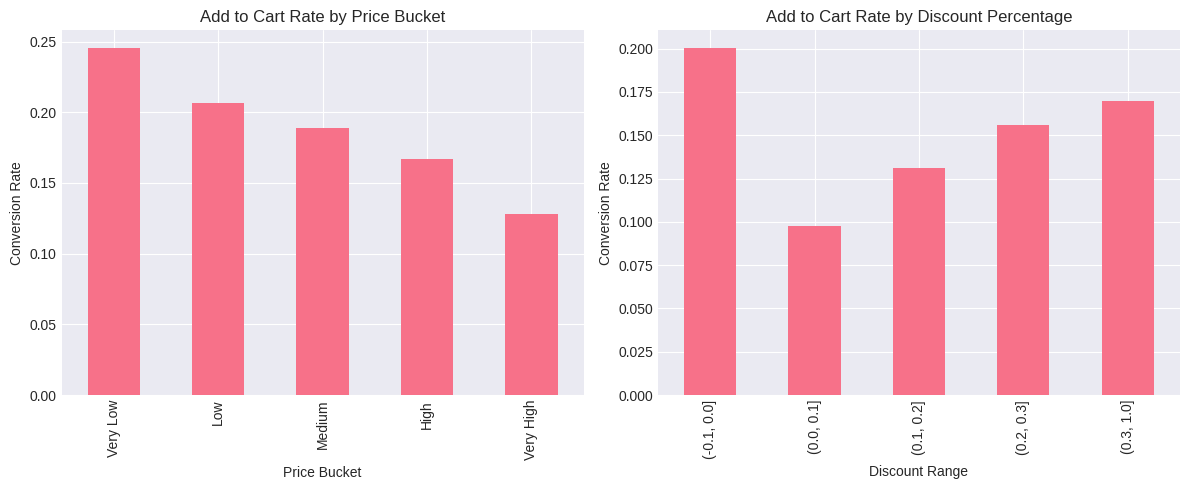

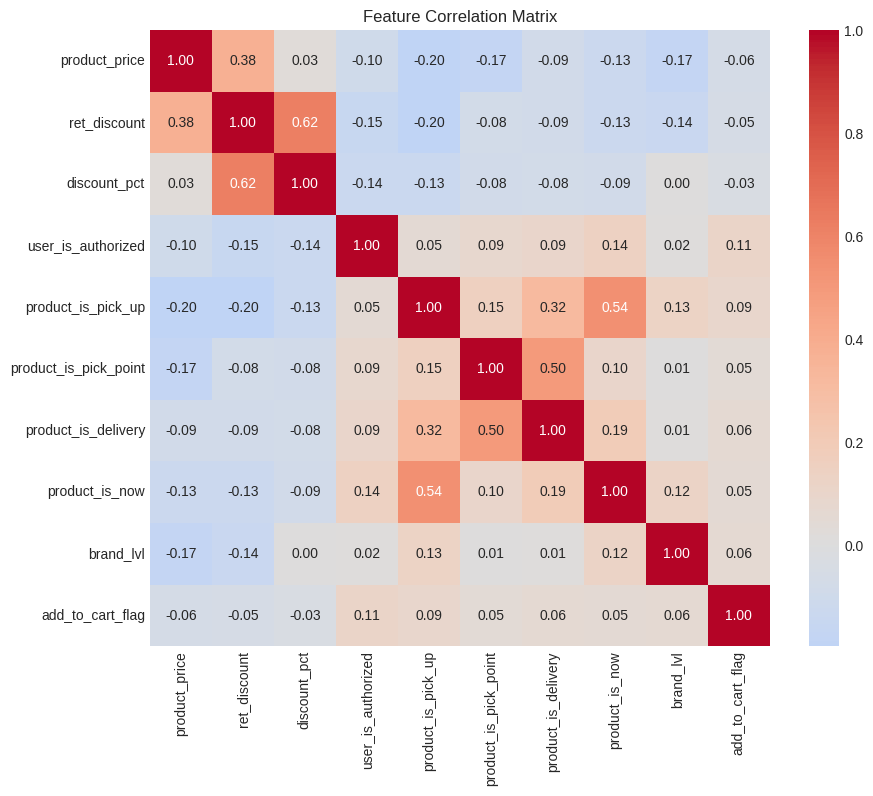

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

price_conversion.plot(kind='bar', ax=ax[0])
ax[0].set_title('Add to Cart Rate by Price Bucket')
ax[0].set_xlabel('Price Bucket')
ax[0].set_ylabel('Conversion Rate')

discount_impact = df.groupby(pd.cut(df['discount_pct'], bins=[-0.1, 0, 0.1, 0.2, 0.3, 1.0]))['add_to_cart_flag'].mean()
discount_impact.plot(kind='bar', ax=ax[1])
ax[1].set_title('Add to Cart Rate by Discount Percentage')
ax[1].set_xlabel('Discount Range')
ax[1].set_ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

correlation_features = ['product_price', 'ret_discount', 'discount_pct', 'user_is_authorized',
                       'product_is_pick_up', 'product_is_pick_point', 'product_is_delivery',
                       'product_is_now', 'brand_lvl', 'add_to_cart_flag']
corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()